In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hiring__mod.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [3]:
# Here experience ,test_score(out of 10) ,interview_score(out of 10) are independent variable
# salary($) is a dependent variable

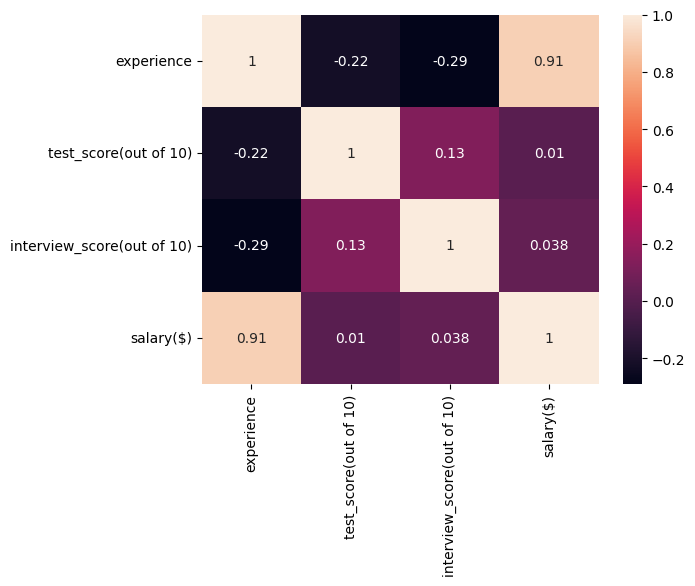

In [4]:
core_matrix = df.corr()
sns.heatmap(core_matrix, annot=True)
plt.show()

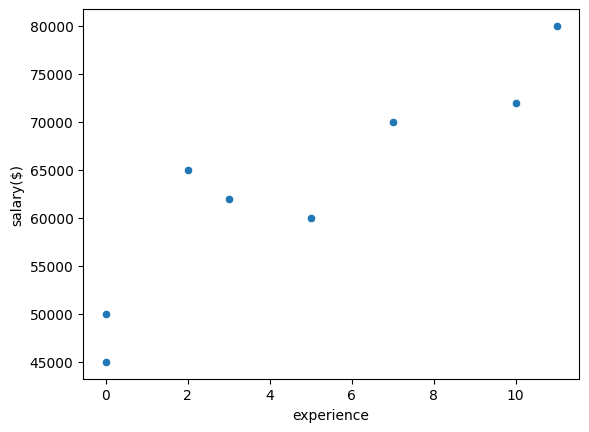

In [5]:
sns.scatterplot(x='experience',y='salary($)',data=df)
plt.show()

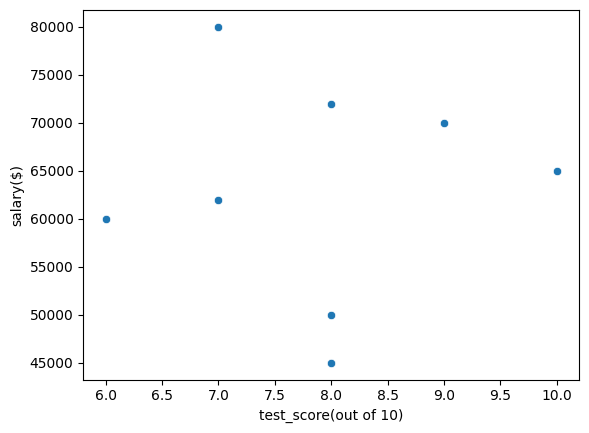

In [6]:
sns.scatterplot(x='test_score(out of 10)',y='salary($)',data=df)
plt.show()

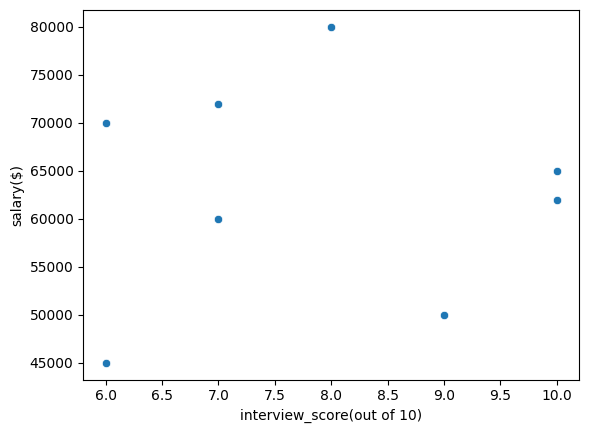

In [7]:
sns.scatterplot(x='interview_score(out of 10)',y='salary($)',data=df)
plt.show()

In [8]:
x= df[['experience','test_score(out of 10)','interview_score(out of 10)']]
y= df['salary($)']

In [9]:
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,8.0,7
7,11,7.0,8


In [10]:
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [11]:
# Spliting dataframe
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
len(x_train)

6

In [14]:
x_train

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
7,11,7.0,8
2,5,6.0,7
4,7,9.0,6
3,2,10.0,10
6,10,8.0,7


In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [16]:
reg.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred = reg.predict(x_test)
y_pred

array([47422.9425232 , 60018.43595614])

In [18]:
y_test

1    45000
5    62000
Name: salary($), dtype: int64

In [19]:
reg.score(x_test,y_test)

0.9321989859471912

In [20]:
# The accuracy of the model is 0.9321989859471912

In [21]:
# Evalution of linear regression model
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [22]:
# R squared
r2_score(y_test,y_pred)
# R squared value lie betwwen 0 to 1 and closser to 1 values indicates a better fit between actual and predicted values

0.9321989859471912

In [23]:
# Mean Square Error(MSE)
mean_squared_error(y_test,y_pred)

4898623.265315437

In [24]:
# Root Mean Square Error(RMSE)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

2213.2833676046625


In [25]:
# The average of squares of all errors 

In [26]:
# Mean Absolute Error(MAE)
mean_absolute_error(y_test,y_pred)

2202.2532835281345

In [27]:
# The average absolute difference between the predicted values and the actual values is 2202.2532835281345

In [28]:
residual = y_test - y_pred

C:\Users\TRISHNA BHOWMIK\AppData\Local\Temp\ipykernel_9384\1108040850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: xlabel='salary($)', ylabel='Density'>

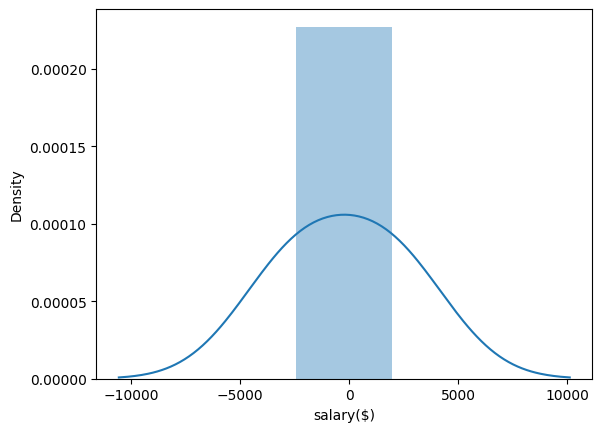

In [29]:
sns.distplot(residual)

Text(0, 0.5, 'Predicted Values')

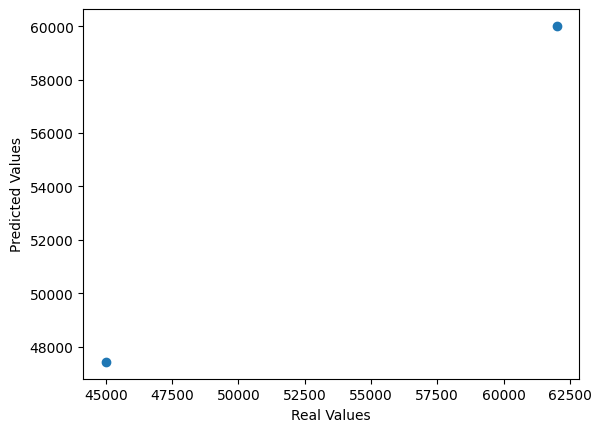

In [30]:
plt.scatter(y_test,y_pred)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')